<a href="https://colab.research.google.com/github/gammapasta/machineLearning/blob/main/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-1.ipynb#scrollTo=Od3gLmcJihAe

bit.ly/hg-02-2

#지도학습


#비지도학습
6장 중간고사

1장 알고리즘 문제점  
훈련 데이터로 훈련이 잘 되어있는지 테스트  
항상 성능이 높게나옴  

어떻게 머신러닝 알고리즘의 성능을 올바르게 평가

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 2차원 샘플 리스트 생성
fish_data = [[l, w] for l,w in zip(fish_length, fish_weight)]
#지도학습을 위한 정답 리스트 생성
fish_target = [1]*35 + [0]*14 # 1이 35개
print(fish_data)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


인덱스(index)  
' 배열의 위치  
' 리스트처럼 배열의 요소 선택 가능

In [3]:
print(fish_data[4]) #5번쨰

[29.0, 430.0]


In [4]:
print(fish_data[:4]) #0,1,2,3 출력

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0]]


In [5]:
print(fish_data[4:]) #4부터 끝까지

[[29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


데이터의 처음 35개를 훈련, 나머지 14개를 테스트

In [6]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [7]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

#왜 정확도가 0%일까???
도미의 데이터만 훈련해서 들어오는 모든 데이터는 도미  
테스트 데이터가 빙어인데 도미가 아니라서 안됨  

-> 샘플링 편향 bias   
훈련데이터에 섞여있어야함  


#넘파이(numpy) 사용한다

In [25]:
import numpy as np

input_arr = np.array(fish_data) #2차원 리스트를 넘파이 배열로
target_arr = np.array(fish_target)

print(input_arr)
print(target_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
print(input_arr.shape) #shape 속성

(49, 2)


주의: input_arr target_arr 순서는 동일하게 변경하기  

np.random.seed()  

np.arange()  

np.random.shuffle()  


In [29]:
np.random.seed(41)

index = np.arange(49)
print(index)

np.random.shuffle(index)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[48 30  8 29 36 14 10  9  7 31 15  5 18 38 27 44 46 43  4 32 13 19 42 39
  2 40 17 45 41 37 33 11 24 28 22 20  6 47  3 26 21 23 25  1 16 34 12 35
  0]


배열인덱싱
여러개의 인덱싱으로 한번에 여러개의 원소를 선택가능

In [30]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [45]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[3], train_input[3])

[ 29. 363.] [  37. 1000.]


In [39]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

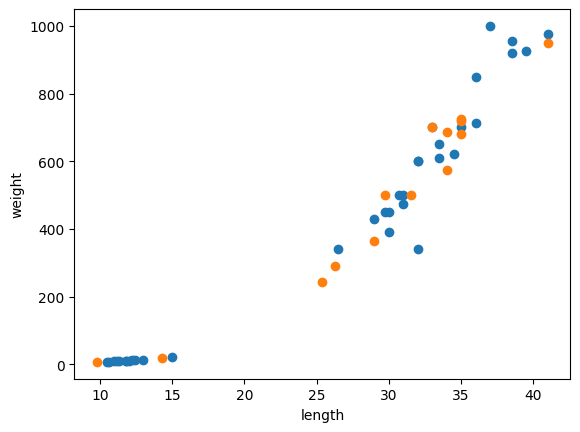

In [55]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
kn.fit(train_input, train_target)

kn.score(test_input, test_target)

1.0

In [42]:
print(np.array_equal(kn.predict(test_input), test_target))

True
